In [50]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (assuming it's available in the notebook environment)
# Replace this with your dataset loading process if necessary
dataset_path = "company_train.csv"  # Adjust path if needed
df = pd.read_csv(dataset_path)



In [51]:
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()

cols = df.select_dtypes(include='number').columns
df[cols] = scaler.fit_transform(df[cols])
df

,ID,company_name,status_label,year,cost_of_goods_sold,depreciation_and_amortization,ebitda,inventory,total_receivables,market_value,net_sales,total_assets,total_long_term_debt,ebit,gross_profit,retained_earnings,total_liabilities,total_operating_expenses,current_ratio,net_profit_margin_category
0,CQZW3V9G,C_1,alive,-1.479142,-0.070088,-0.151748,-0.130006,0.186585,-0.103099,-0.163020,-0.096345,-0.152893,-0.159331,-0.111793,-0.142399,-0.038716,-0.163213,-0.086052,-0.004974,Low Profit Margin
1,CIRJ6YT8,C_1,alive,-1.248198,-0.085111,-0.151368,-0.144087,0.169051,-0.114856,-0.162715,-0.110554,-0.156651,-0.159536,-0.130806,-0.151907,-0.038127,-0.169649,-0.099715,0.002594,Low Profit Margin
2,CAHLFH0N,C_1,alive,-1.017254,-0.108703,-0.144071,-0.165302,0.130406,-0.148500,-0.163591,-0.132854,-0.155849,-0.142740,-0.162214,-0.166795,-0.050616,-0.163458,-0.121327,-0.007193,Low Profit Margin
3,CBU4UE1T,C_1,alive,-0.786310,-0.112447,-0.135364,-0.163282,0.100135,-0.158511,-0.179059,-0.135920,-0.158113,-0.166363,-0.163084,-0.167615,-0.053619,-0.164804,-0.125240,-0.016778,Low Profit Margin
4,C0DQ4A9M,C_1,alive,-0.555366,-0.109102,-0.136280,-0.153722,0.085691,-0.124260,-0.167484,-0.131601,-0.155937,-0.128949,-0.149904,-0.161726,-0.052112,-0.162224,-0.122095,-0.003258,Low Profit Margin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62891,C5YUITTK,C_8967,alive,1.292187,5.477922,1.547521,2.755365,6.054538,3.835516,1.104117,4.638656,1.968637,1.532836,3.054539,1.696892,0.002546,1.741557,4.811742,-0.013449,Low Profit Margin
62892,CIEU9YM0,C_8967,alive,1.523131,4.705208,1.644342,3.006566,5.572644,3.542486,2.106725,4.100590,2.101220,1.677133,3.351190,1.836814,0.089537,1.878714,4.144674,-0.012137,Healthy Profit Margin
62893,CPKJX8ET,C_8967,alive,1.754075,4.477399,1.715097,3.300585,5.804499,3.803354,2.891153,3.978453,2.396725,2.332702,3.715889,1.997121,0.716685,2.160298,3.948028,-0.009716,Healthy Profit Margin
62894,C4NM38WN,C_8968,alive,1.754075,-0.174744,-0.185136,-0.200483,-0.187050,-0.217173,-0.185440,-0.193115,-0.217377,-0.239695,-0.192465,-0.201402,-0.107058,-0.226952,-0.183953,0.069688,Low Profit Margin


In [52]:
cols = ['ebitda', 'total_assets', 'net_sales']

df_new = df[cols]

df_new

,ebitda,total_assets,net_sales
0,-0.130006,-0.152893,-0.096345
1,-0.144087,-0.156651,-0.110554
2,-0.165302,-0.155849,-0.132854
3,-0.163282,-0.158113,-0.135920
4,-0.153722,-0.155937,-0.131601
...,...,...,...
62891,2.755365,1.968637,4.638656
62892,3.006566,2.101220,4.100590
62893,3.300585,2.396725,3.978453
62894,-0.200483,-0.217377,-0.193115


In [53]:
# ! pip install yellowbrick

In [54]:
# Impor library dan modul yang dibutuhkan pada tugas ini (boleh ditambahkan jika kurang)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.cm as cm
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif

In [55]:
# Menghitung Silhouette Coeff
for k in [2, 3, 4, 5]:
    # Mendefinisikan model K-Means dengan nilai k tertentu
    clusterer = KMeans(n_clusters = k, n_init=10)

    # Menghitung sihouette_score untuk mengukur seberapa baik klaster yang terbentuk.
    cluster_labels = clusterer.fit_predict(df_new)
    silhouette_avg = silhouette_score(df_new, cluster_labels)
    print(f"Untuk k = {k}, rata-rata silhouette_coefficient adalah: {silhouette_avg}")

Untuk k = 2, rata-rata silhouette_coefficient adalah: 0.97203355539606
Untuk k = 3, rata-rata silhouette_coefficient adalah: 0.9278762597670057
Untuk k = 4, rata-rata silhouette_coefficient adalah: 0.9120993866545382
Untuk k = 5, rata-rata silhouette_coefficient adalah: 0.8785692873452858


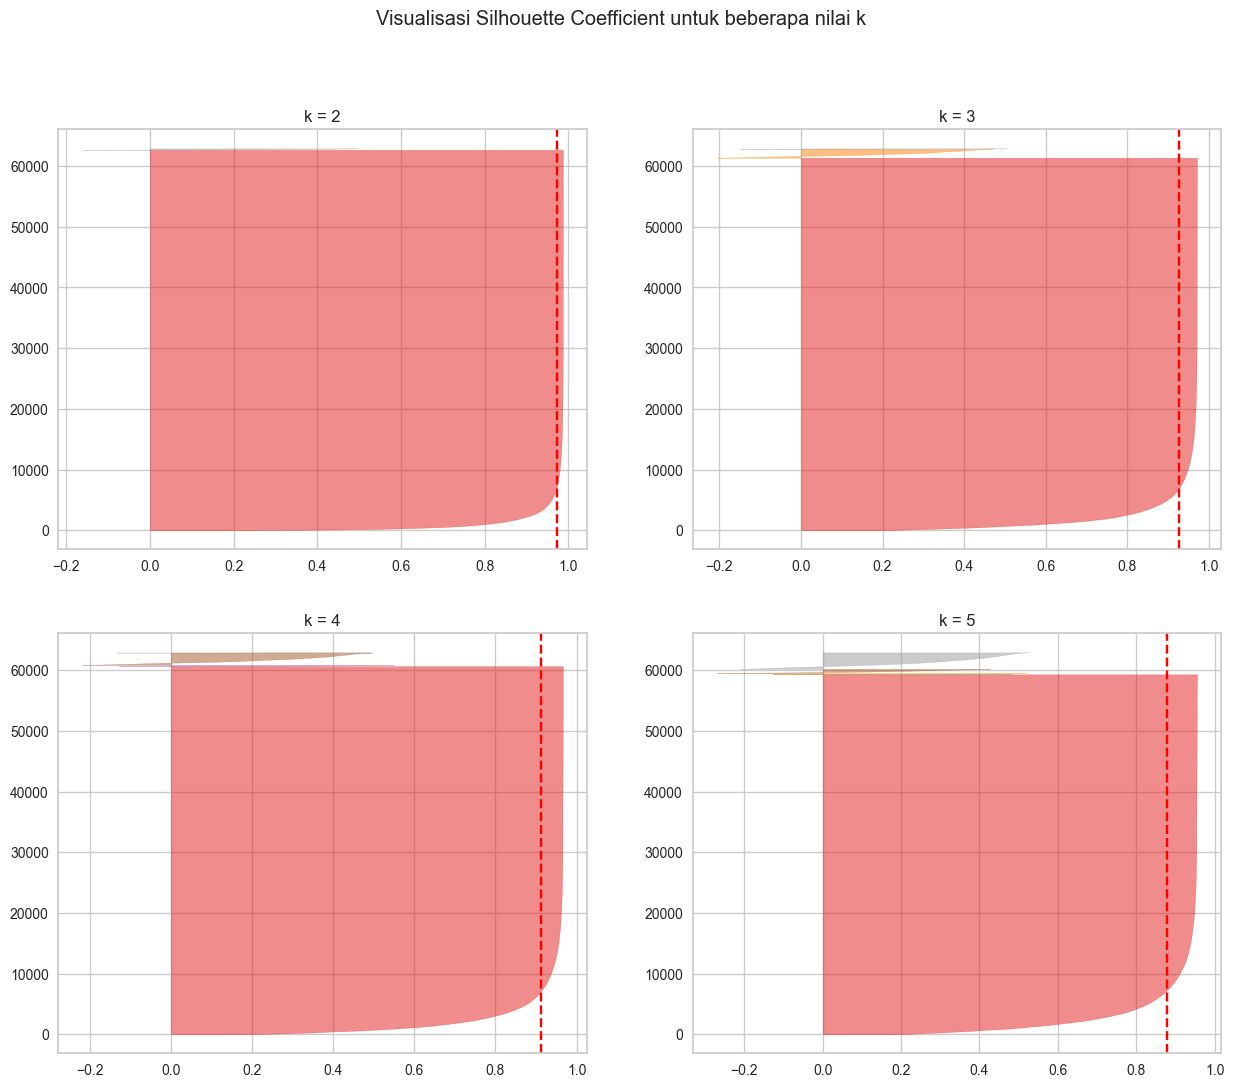

In [56]:
# Memvisualisasikan silhouette

fig, ax = plt.subplots(2, 2, figsize=(15,12))
fig.suptitle("Visualisasi Silhouette Coefficient untuk beberapa nilai k")
for k in [2, 3, 4, 5]:
    # Mendefinisikan model K-Means dengan nilai k tertentu
    clusterer = KMeans(n_clusters=k, n_init=10)

    # Memvisualisasikan densitas tiap klaster yang terbentuk
    q, mod = divmod(k, 2)
    ax[q-1][mod].set_title(f"k = {k}")
    visualizer = SilhouetteVisualizer(clusterer, ax = ax[q-1][mod])
    visualizer.fit(df_new)

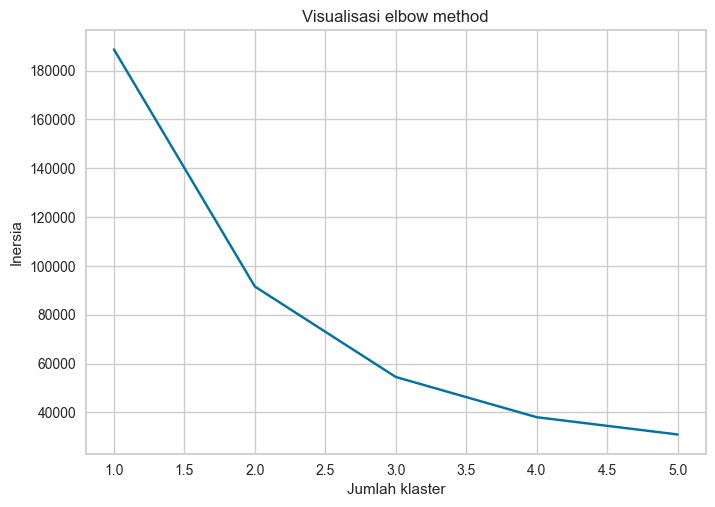

In [57]:
# Memvisualisasikan elbow method
inertia = []
for cluster in range(1, 6):
    km = KMeans(n_clusters=cluster, n_init=10)
    km = km.fit(df_new)
    inertia.append(km.inertia_)

plt.plot(range(1, 6), inertia, 'bx-')
plt.xlabel('Jumlah klaster')
plt.ylabel('Inersia')
plt.title('Visualisasi elbow method')
plt.show()

Didapat cluster paling bagus adalah 2

In [63]:
# Latih model sesuai jumlah klaster optimal
kmeans = KMeans(n_clusters=2, n_init=10)
assignment = kmeans.fit_predict(df_new)

In [64]:
assignment

array([0, 0, 0, ..., 0, 0, 0])

In [65]:
# Append hasil clustering ke dataframe
df_with_clusters = pd.DataFrame(df_new.copy())
df_with_clusters['cluster'] = assignment
df_with_clusters.nunique()


ebitda          48444
total_assets    57934
net_sales       55867
cluster             2
dtype: int64

In [67]:
# Assuming df_with_clusters is your DataFrame with a 'cluster' column
# Replace 'assignment' with the cluster assignment array if applicable

# Count the occurrences of each cluster
cluster_counts = df_with_clusters['cluster'].value_counts()

# Print the counts for clusters 0, 1, and 2
print("Counts for each cluster:")
print(cluster_counts)

Counts for each cluster:
cluster
0    62665
1      231
Name: count, dtype: int64


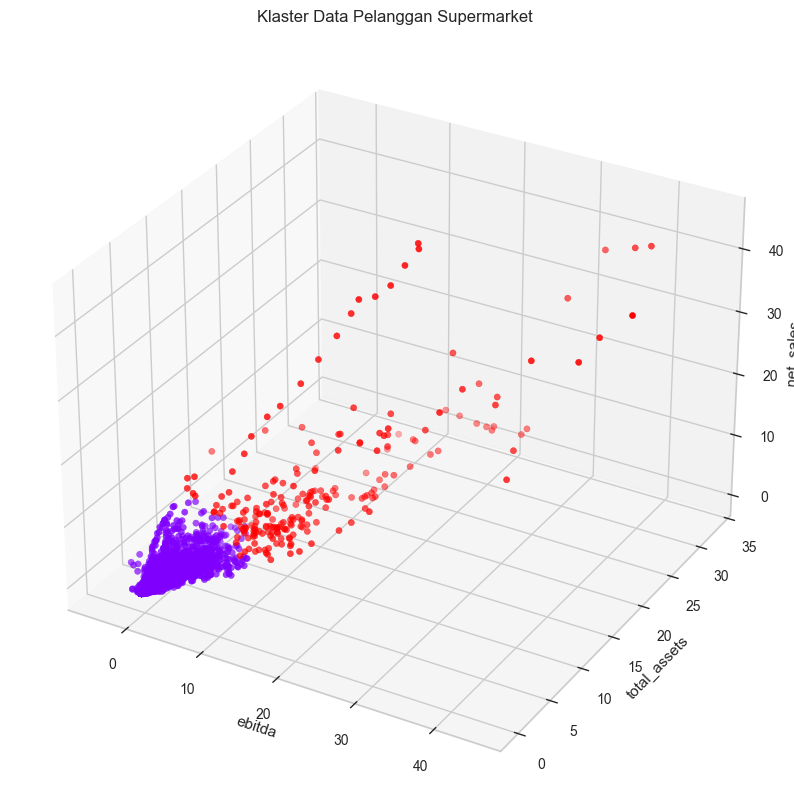

In [ ]:
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection="3d")

# Menyiapkan beberapa variabel yang diperlukan untuk visualisasi
x = df_with_clusters['ebitda']
y = df_with_clusters['total_assets']
z = df_with_clusters['net_sales']
cluster = df_with_clusters['cluster']

# Memvisualisasikan hasilnya
ax.scatter(x, y, z, c = cluster, cmap = "rainbow")
plt.title("Klaster Data Pelanggan Supermarket")
plt.grid(False)
ax.set_xlabel('ebitda')
ax.set_ylabel('total_assets')
ax.set_zlabel('net_sales')

plt.show()